In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('List of Countries by Sugarcane Production.csv')
df.shape

(103, 7)

In [3]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


## Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [5]:
df['Production (Tons)']=df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace('.','').str.replace(',','')
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','')

In [6]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [7]:
df=df.drop('Unnamed: 0',axis=1)

In [8]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668531,10226205,751675
1,India,Asia,348448000,260721,4950000,703935
2,China,Asia,123059739,88287,1675215,734591
3,Thailand,Asia,87468496,1264303,1336575,654422
4,Pakistan,Asia,65450704,324219,1130820,57879


In [9]:
df.rename(columns={'Production (Tons)':'Production(Tons)'},inplace=True)
df.rename(columns={'Production per Person (Kg)':'Production_per_Person'},inplace=True)
df.rename(columns={'Acreage (Hectare)':'Acreage(Hectare)'},inplace=True)
df.rename(columns={'Yield (Kg / Hectare)':'Yield(Kg/Hectare)'},inplace=True)


In [10]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person,Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668531,10226205,751675
1,India,Asia,348448000,260721,4950000,703935
2,China,Asia,123059739,88287,1675215,734591
3,Thailand,Asia,87468496,1264303,1336575,654422
4,Pakistan,Asia,65450704,324219,1130820,57879


In [11]:
df.isna().sum()

Country                  0
Continent                0
Production(Tons)         0
Production_per_Person    0
Acreage(Hectare)         1
Yield(Kg/Hectare)        1
dtype: int64

In [12]:
df[df['Acreage(Hectare)'].isnull()]

,Country,Continent,Production(Tons),Production_per_Person,Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [13]:
df=df.dropna().reset_index().drop('index',axis=1)

In [14]:
df

,Country,Continent,Production(Tons),Production_per_Person,Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668531,10226205,751675
1,India,Asia,348448000,260721,4950000,703935
2,China,Asia,123059739,88287,1675215,734591
3,Thailand,Asia,87468496,1264303,1336575,654422
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,435965
98,Lebanon,Asia,97,16,3,283864
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,119498


In [15]:
df.nunique()

Country                  102
Continent                  6
Production(Tons)         102
Production_per_Person    101
Acreage(Hectare)         101
Yield(Kg/Hectare)        102
dtype: int64

In [16]:
df.dtypes

Country                  object
Continent                object
Production(Tons)         object
Production_per_Person    object
Acreage(Hectare)         object
Yield(Kg/Hectare)        object
dtype: object

In [17]:
df['Production(Tons)']=df['Production(Tons)'].astype(float)
df['Production_per_Person']=df['Production_per_Person'].astype(float)
df['Acreage(Hectare)']=df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)']=df['Yield(Kg/Hectare)'].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                102 non-null    object 
 1   Continent              102 non-null    object 
 2   Production(Tons)       102 non-null    float64
 3   Production_per_Person  102 non-null    float64
 4   Acreage(Hectare)       102 non-null    float64
 5   Yield(Kg/Hectare)      102 non-null    float64
dtypes: float64(4), object(2)
memory usage: 4.9+ KB


## Unvariate analysis

In [19]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person,Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


## how many countries produce sugarcane each continent

In [20]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

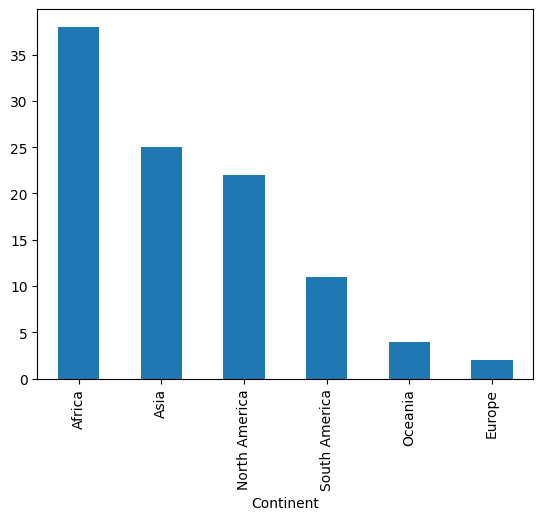

In [21]:
df['Continent'].value_counts().plot(kind='bar')

In [22]:
df.describe()


,Production(Tons),Production_per_Person,Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,1.850372e+07,4.124805e+05,2.498981e+05,5.018502e+05
std,8.419149e+07,8.669140e+05,1.137003e+06,3.169530e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,6.251875e+04,1.075225e+04,1.104000e+03,2.487505e+05
50%,1.440044e+06,8.135850e+04,1.655800e+04,5.102500e+05
75%,6.426824e+06,2.828128e+05,8.047400e+04,7.198920e+05
max,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


## checking Outliers

Text(0.5, 1.0, 'Yield(Kg/Hectare)')

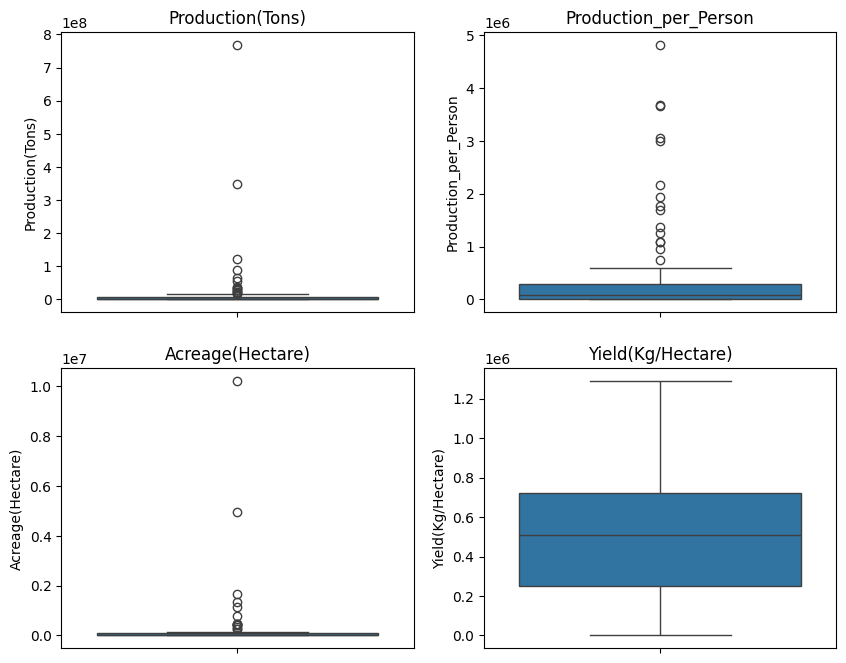

In [23]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.title('Production(Tons)')
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person'])
plt.title('Production_per_Person')
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.title('Acreage(Hectare)')
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])
plt.title('Yield(Kg/Hectare)')

## Distribution of Columns

C:\Users\hp\AppData\Local\Temp\ipykernel_10424\4237351502.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\hp\AppData\Local\Temp\ipykernel_10424\4237351502.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_Person"])
C:\Users\hp\AppData\Loc

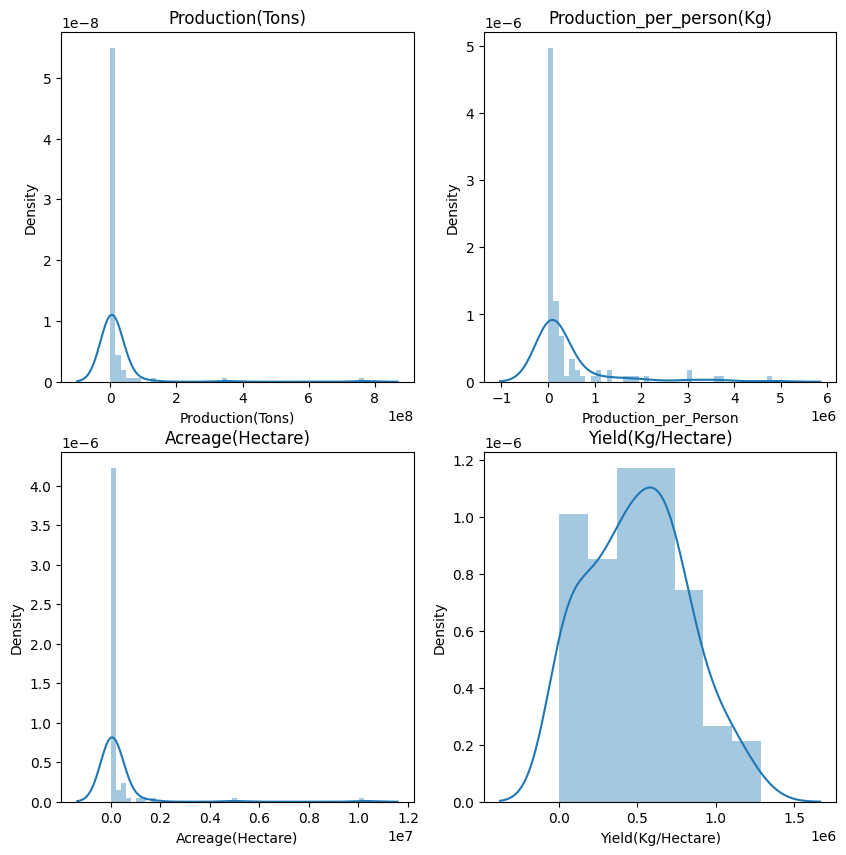

In [24]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.distplot(df["Production_per_Person"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

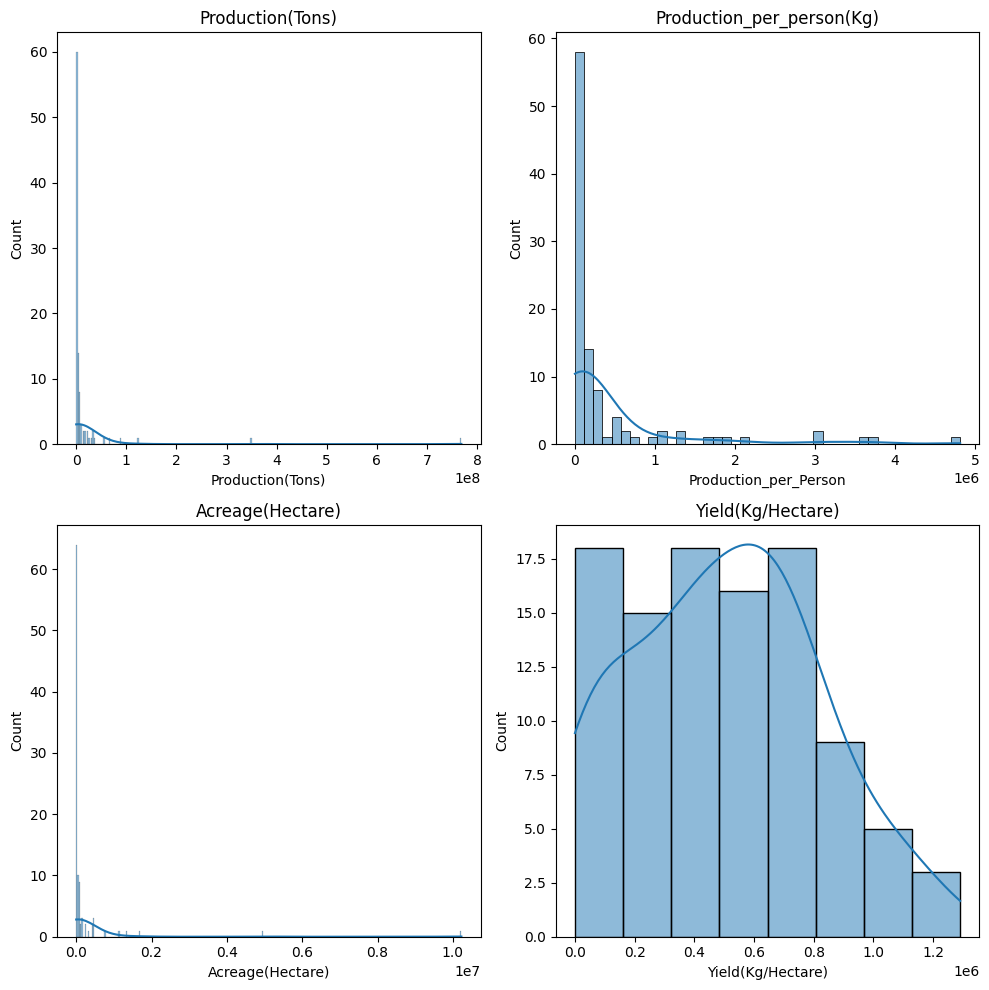

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

# Subplot 1: Histogram and KDE for Production(Tons)
plt.subplot(2, 2, 1)
sns.histplot(df["Production(Tons)"], kde=True)
plt.title("Production(Tons)")

# Subplot 2: Histogram and KDE for Production_per_Person
plt.subplot(2, 2, 2)
sns.histplot(df["Production_per_Person"], kde=True)
plt.title("Production_per_person(Kg)")

# Subplot 3: Histogram and KDE for Acreage(Hectare)
plt.subplot(2, 2, 3)
sns.histplot(df["Acreage(Hectare)"], kde=True)
plt.title("Acreage(Hectare)")

# Subplot 4: Histogram and KDE for Yield(Kg/Hectare)
plt.subplot(2, 2, 4)
sns.histplot(df["Yield(Kg/Hectare)"], kde=True)
plt.title("Yield(Kg/Hectare)")

plt.tight_layout()
plt.show()


## which country produce maximum sugarcane

In [26]:
df_new=df[['Country','Production(Tons)']].set_index('Country')

In [27]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [28]:
df_new["Production(Tons)_percent"] = df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()

In [29]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

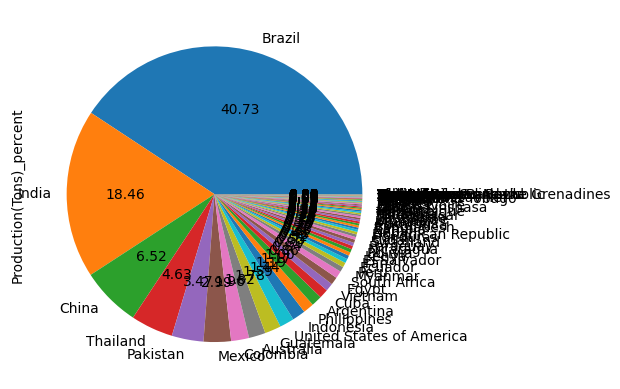

In [30]:
df_new['Production(Tons)_percent'].plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Country'>

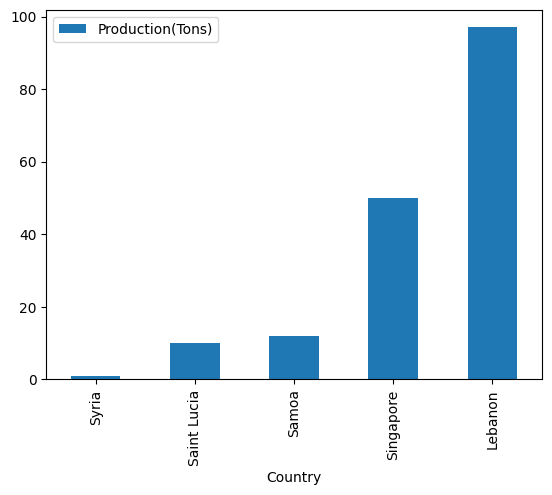

In [31]:
df[['Country','Production(Tons)']].set_index('Country').sort_values('Production(Tons)',ascending=True).head().plot(kind='bar')

C:\Users\hp\AppData\Local\Temp\ipykernel_10424\2823669880.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


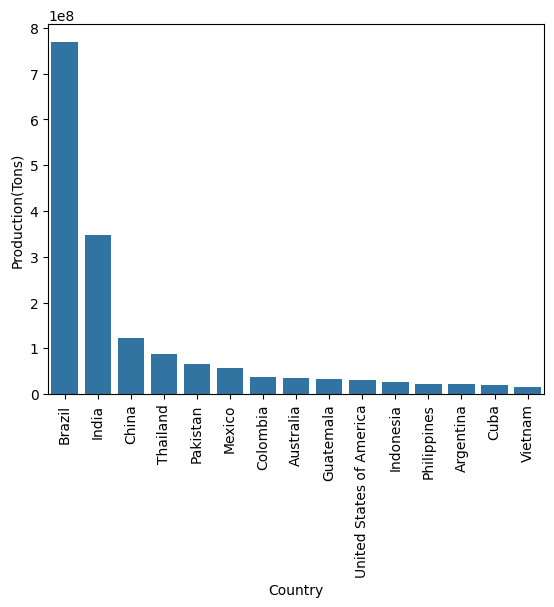

In [32]:
ax = sns.barplot(data = df.head(15),  x= "Country", y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

## Which country has highest land

C:\Users\hp\AppData\Local\Temp\ipykernel_10424\171533327.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


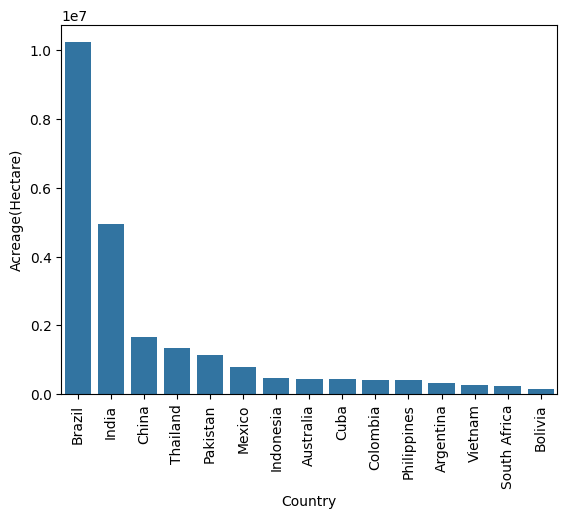

In [33]:
df_acr=df.sort_values('Acreage(Hectare)',ascending=False).head(15)
ax=sns.barplot(data=df_acr,x='Country',y='Acreage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## which country has highest yield per hectare

C:\Users\hp\AppData\Local\Temp\ipykernel_10424\3598592286.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


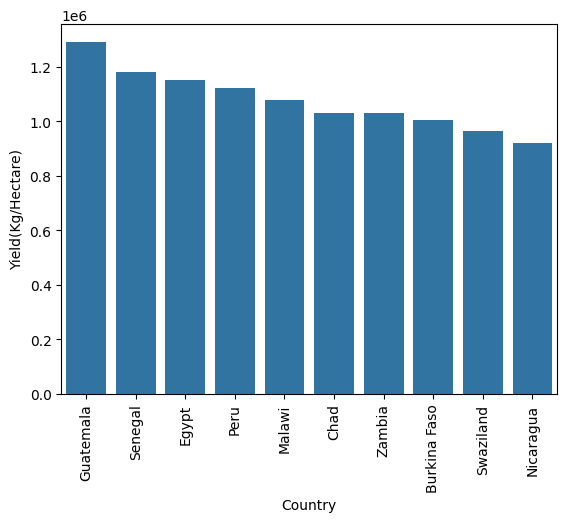

In [34]:
df_yield=df.sort_values('Yield(Kg/Hectare)',ascending=False).head(10)
ax=sns.barplot(data=df_yield,x='Country',y='Yield(Kg/Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## which has highest country production

C:\Users\hp\AppData\Local\Temp\ipykernel_10424\27190621.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


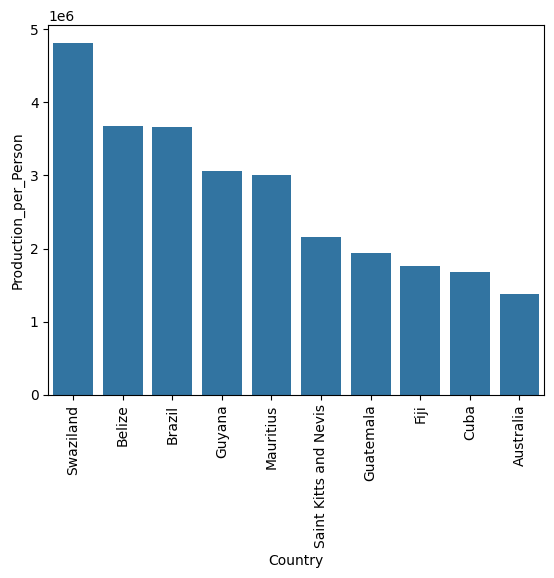

In [35]:
df_yield=df.sort_values('Production_per_Person',ascending=False).head(10)
ax=sns.barplot(data=df_yield,x='Country',y='Production_per_Person')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## Correlation

In [36]:
df['Production(Tons)']=df['Production(Tons)'].astype(float)
df['Production_per_Person']=df['Production_per_Person'].astype(float)
df['Acreage(Hectare)']=df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)']=df['Yield(Kg/Hectare)'].astype(float)

In [37]:
df.describe()


,Production(Tons),Production_per_Person,Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,1.850372e+07,4.124805e+05,2.498981e+05,5.018502e+05
std,8.419149e+07,8.669140e+05,1.137003e+06,3.169530e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,6.251875e+04,1.075225e+04,1.104000e+03,2.487505e+05
50%,1.440044e+06,8.135850e+04,1.655800e+04,5.102500e+05
75%,6.426824e+06,2.828128e+05,8.047400e+04,7.198920e+05
max,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


## Do countries with highest land producemore sugarcane

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

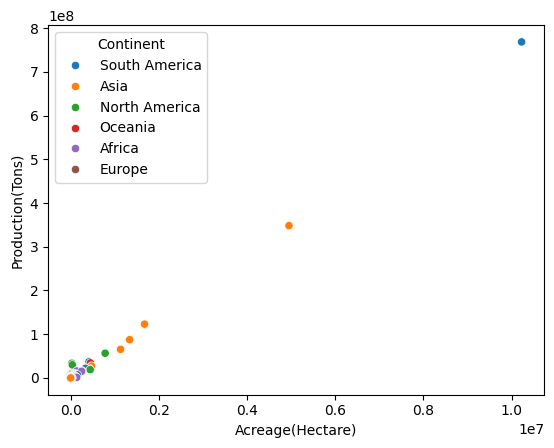

In [38]:
sns.scatterplot(data =df,x='Acreage(Hectare)',y='Production(Tons)',hue='Continent')

## Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

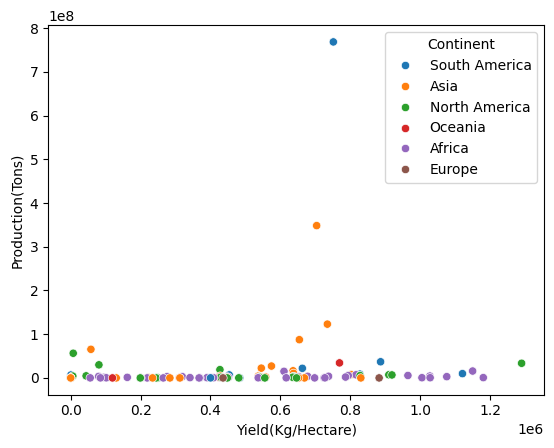

In [39]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)" , y = "Production(Tons)", hue = "Continent")

In [40]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person,Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


## analysis of continent

In [41]:
df_continent=df.groupby('Continent').sum()

In [42]:
df_continent['number_of_countries']=df.groupby('Continent').count()['Country']

In [43]:
df_continent

,Country,Production(Tons),Production_per_Person,Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,10144110.0,1439089.0,20700454.0,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,3120808.0,10608319.0,11197308.0,25
Europe,PortugalSpain,5823.0,536.0,71.0,1318709.0,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,15420953.0,1581983.0,9581162.0,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,3158066.0,490909.0,1624191.0,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,10228540.0,11369236.0,6766896.0,11


## Which Continent produces maximum sugarcane

<Axes: xlabel='Continent'>

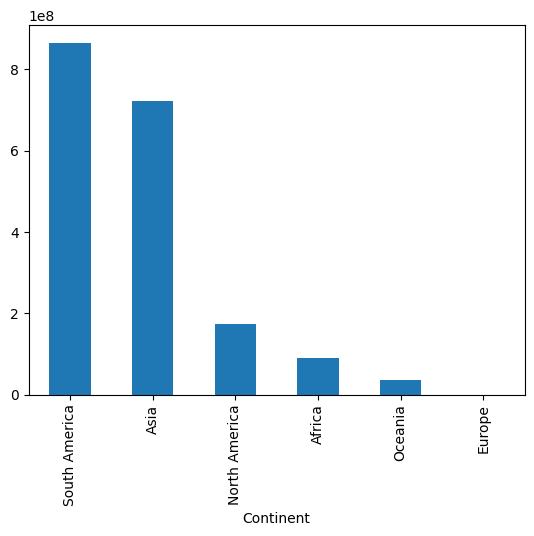

In [44]:
df_continent['Production(Tons)'].sort_values(ascending=False).plot(kind='bar')

## Do number of  countries in a continent effects production of sugarcane

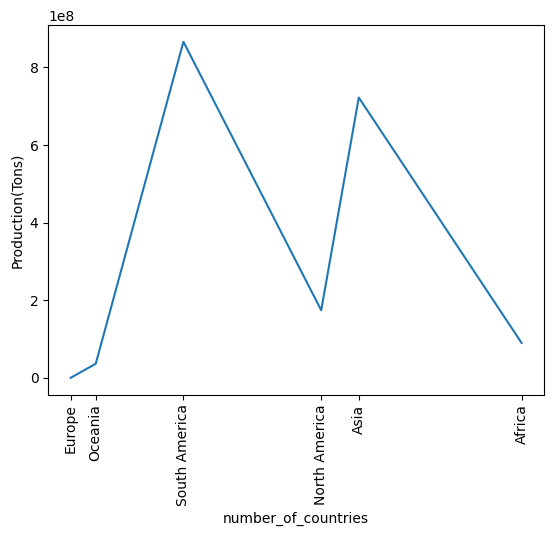

In [46]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

## Do continent with highest land produces more sugarcane?


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

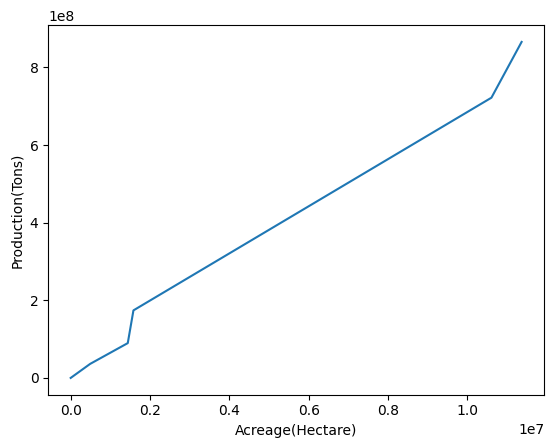

In [47]:
sns.lineplot(data=df_continent,x='Acreage(Hectare)',y='Production(Tons)')

## Production distribution by Continent

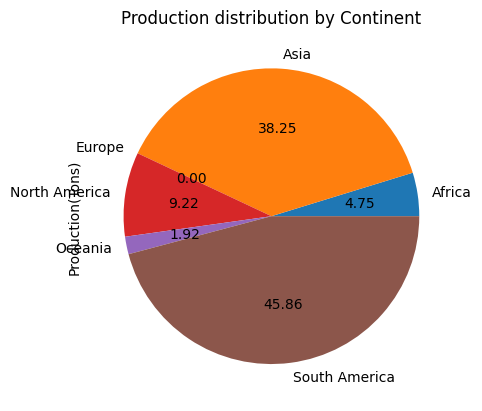

In [49]:
df_continent['Production(Tons)'].plot(kind='pie',autopct='%.2f')
plt.title("Production distribution by Continent")
plt.show()

## Continent by Corealtion

In [53]:
df_continent=pd.DataFrame(df_continent)
df_continent.corr()

ValueError: could not convert string to float: "EgyptSouth AfricaKenyaSwazilandSudanZambiaMauritiusUgandaZimbabweMadagascarTanzaniaMalawiMozambiqueCongo-KinshasaCôte d'IvoireEthiopiaNigeriaCameroonSenegalCongo-BrazzavilleAngolaBurkina FasoChadMoroccoMaliGuineaGabonLiberiaBurundiNigerSomaliaGhanaCentral African RepublicRwandaSierra LeoneCape VerdeBeninGuinea-Bissau"